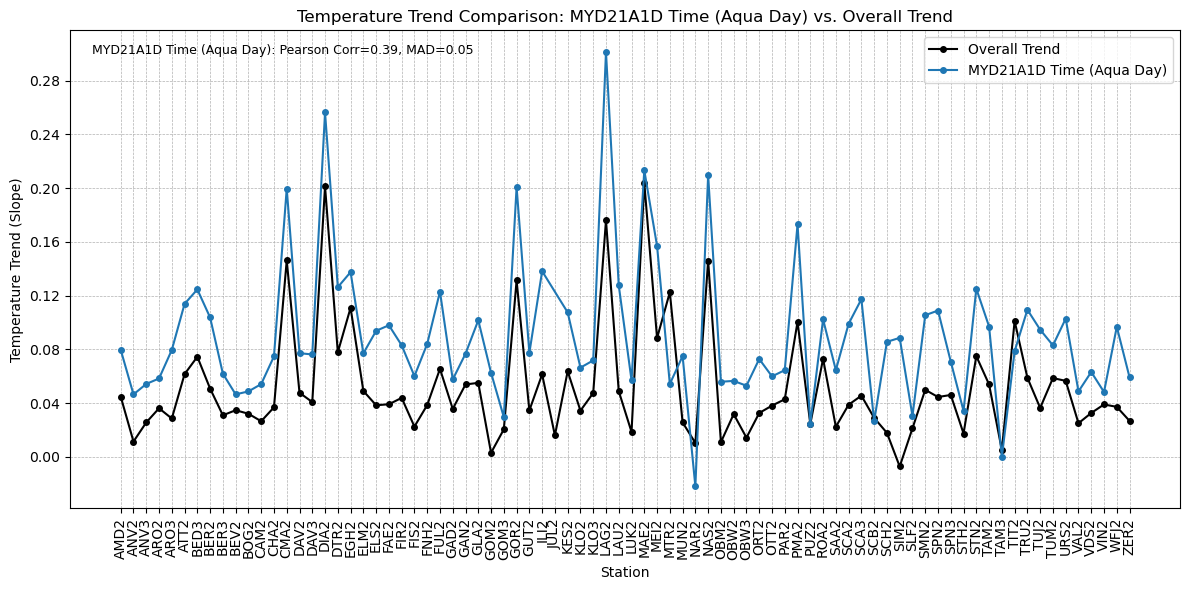

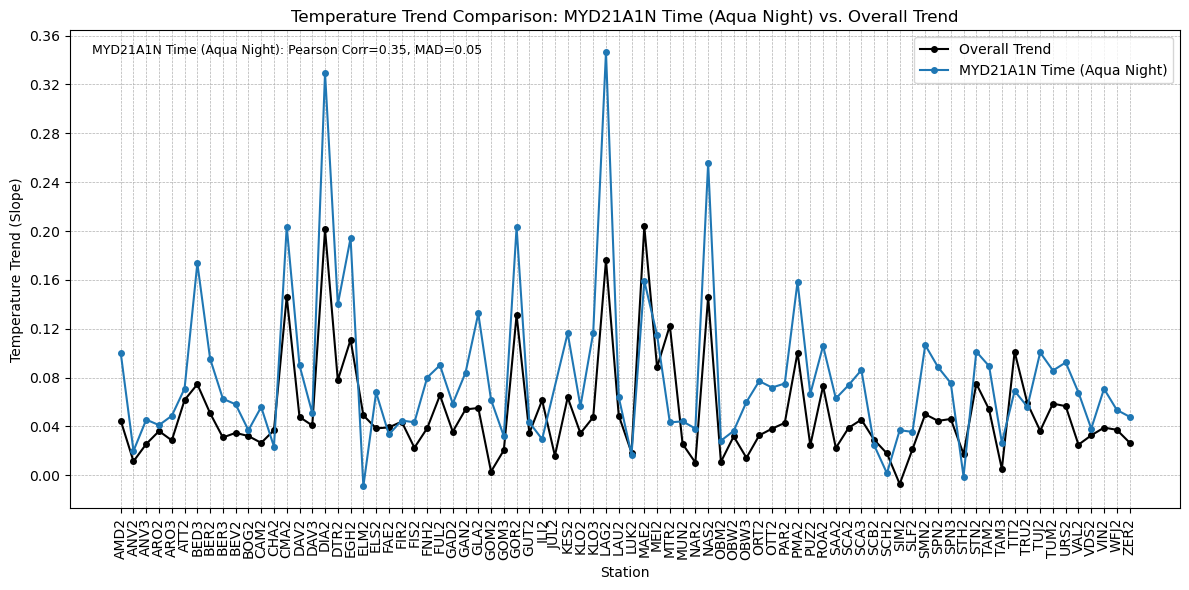

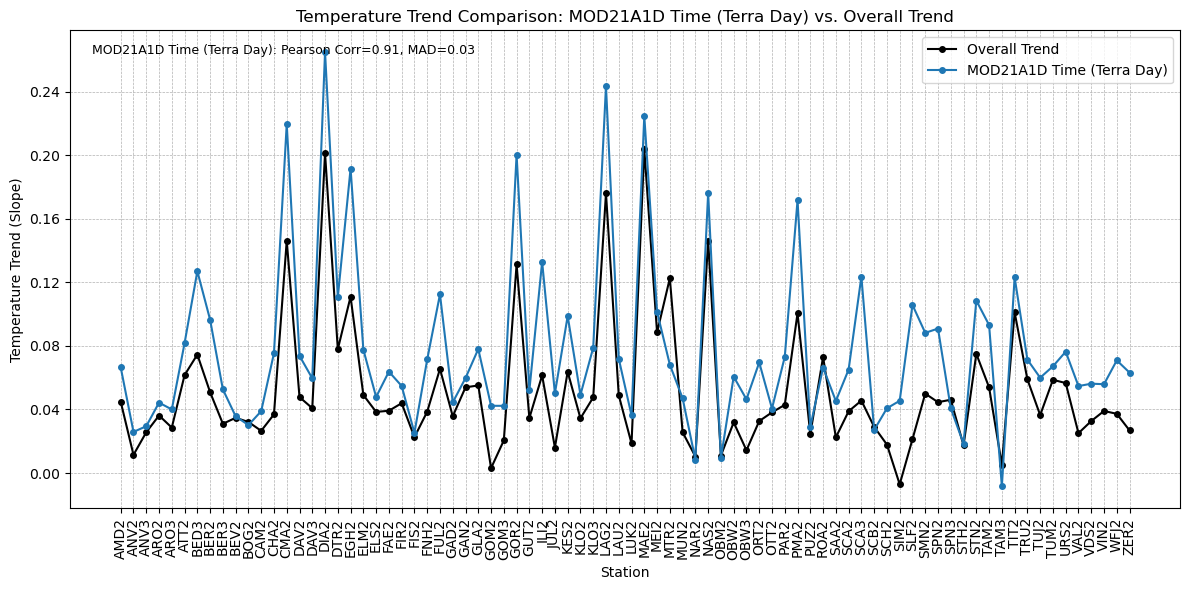

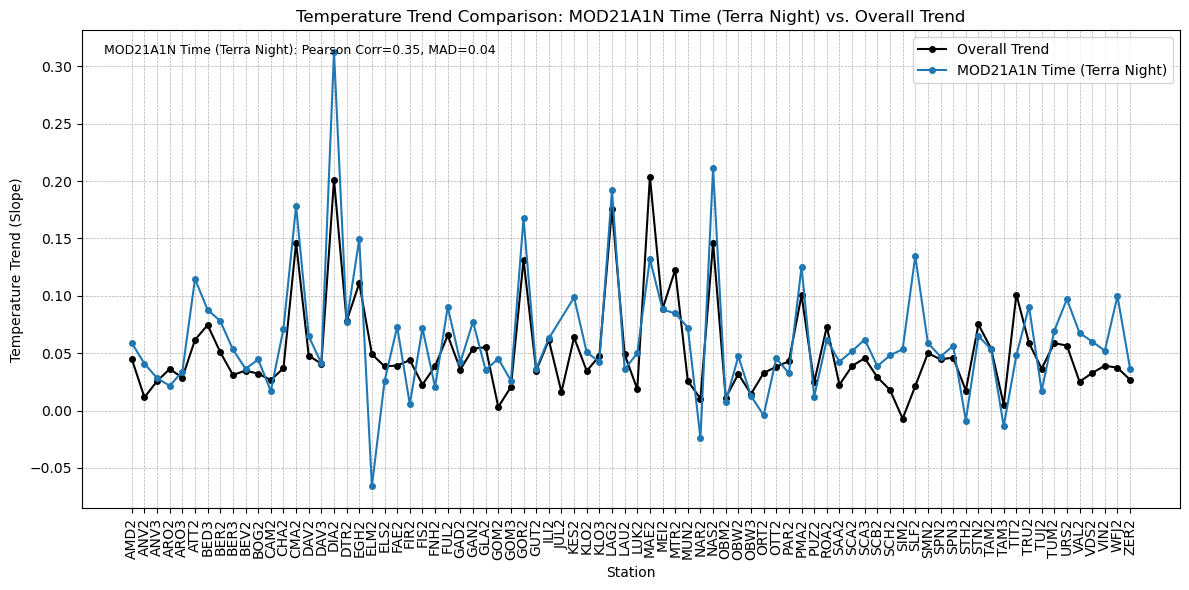

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define paths to each of the station_slope files
paths = {
    "Overall Trend": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\station_slopes.csv",
    "MYD21A1D Time (Aqua Day)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW aqua day time\station_slopes.csv",
    "MYD21A1N Time (Aqua Night)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW aqua night time\station_slopes.csv",
    "MOD21A1D Time (Terra Day)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW terra day time\station_slopes.csv",
    "MOD21A1N Time (Terra Night)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW terra night time\station_slopes.csv"
}

# Load the "Overall Trend" file to use for correlation calculations and as a reference
overall_df = pd.read_csv(paths["Overall Trend"], header=None, skiprows=1)
overall_trend = overall_df[1]  # Extract the trend column

# Iterate over each observation time (skip "Overall Trend" itself in the loop)
for label, path in paths.items():
    if label == "Overall Trend":
        continue  # Skip plotting the overall trend by itself

    plt.figure(figsize=(12, 6))  # Create a new figure for each observation time

    # Plot the overall trend as a reference in each figure
    plt.plot(overall_df[0], overall_trend, label="Overall Trend", marker='o', markersize=4, color='black')

    # Load the specific observation time file
    try:
        df = pd.read_csv(path, header=None, skiprows=1)
        
        # Ensure the file has at least two columns
        if df.shape[1] >= 2:
            # Plot the specific observation time trend
            plt.plot(df[0], df[1], label=label, marker='o', markersize=4)

            # Calculate correlation with the overall trend
            correlation = df[1].corr(overall_trend)
            
            # Calculate Mean Absolute Difference (MAD)
            mad = (df[1] - overall_trend).abs().mean()

            # Display correlation and MAD on the plot
            plt.text(0.02, 0.95, f"{label}: Pearson Corr={correlation:.2f}, MAD={mad:.2f}", 
                     transform=plt.gca().transAxes, fontsize=9, color="black", ha="left")
        else:
            print(f"Warning: File at {label} does not contain the expected columns.")
    except FileNotFoundError:
        print(f"File not found: {path}")

    # Improve y-axis readability
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Limit the number of ticks to 10
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add plot details
    plt.xlabel('Station')
    plt.ylabel('Temperature Trend (Slope)')
    plt.title(f'Temperature Trend Comparison: {label} vs. Overall Trend')
    plt.legend()
    plt.xticks(rotation=90)  # Rotate station labels if needed
    plt.tight_layout()  # Adjust layout to prevent label overlap

    # Show the plot for the current observation time
    plt.show()

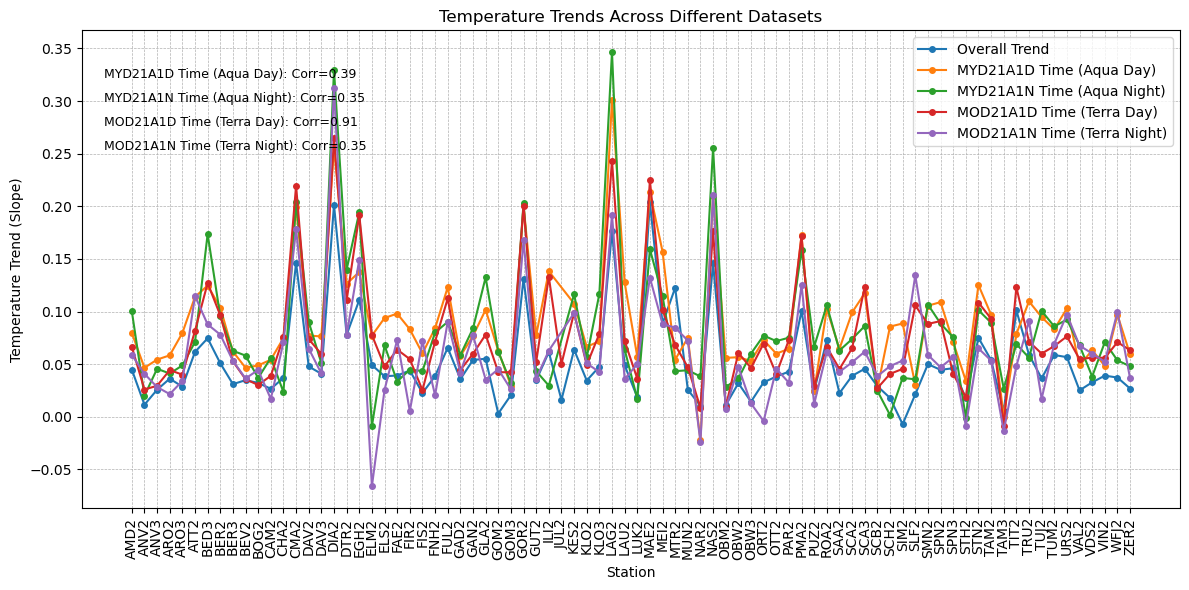

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define paths to each of the station_slope files
paths = {
    "Overall Trend": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\station_slopes.csv",
    "MYD21A1D Time (Aqua Day)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW aqua day time\station_slopes.csv",
    "MYD21A1N Time (Aqua Night)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW aqua night time\station_slopes.csv",
    "MOD21A1D Time (Terra Day)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW terra day time\station_slopes.csv",
    "MOD21A1N Time (Terra Night)": r"E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\interporelated data\NEW terra night time\station_slopes.csv"
}

# Load the "Overall Trend" file first to use for correlation calculations
overall_df = pd.read_csv(paths["Overall Trend"], header=None, skiprows=1)
overall_trend = overall_df[1]  # Extract the trend column

# Initialize the plot
plt.figure(figsize=(12, 6))

# Load each file, plot the trend, and calculate/display compatibility
for label, path in paths.items():
    try:
        # Load CSV file without column names, skipping the first row
        df = pd.read_csv(path, header=None, skiprows=1)
        
        # Ensure that the file has at least two columns
        if df.shape[1] >= 2:
            # Plot using the first column as 'station' and the second column as 'trend'
            plt.plot(df[0], df[1], label=label, marker='o', markersize=4)
            
            # Calculate correlation with the overall trend (skip "Overall Trend" itself)
            if label != "Overall Trend":
                correlation = df[1].corr(overall_trend)
                plt.text(0.02, 0.95 - 0.05 * list(paths.keys()).index(label), f"{label}: Corr={correlation:.2f}", 
                         transform=plt.gca().transAxes, fontsize=9, color="black", ha="left")
        else:
            print(f"Warning: File at {label} does not contain the expected columns.")
    except FileNotFoundError:
        print(f"File not found: {path}")

# Improve y-axis readability
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Limit the number of ticks to 10
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add plot details
plt.xlabel('Station')
plt.ylabel('Temperature Trend (Slope)')
plt.title('Temperature Trends Across Different Datasets')
plt.legend()
plt.xticks(rotation=90)  # Rotate station labels if needed
plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()
